In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


In [83]:
df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,21,2,1,1,1,0,45,3,0,106,63,39,28,0.619048,41,39,23,4,34
882,20,2,2,1,0,0,13,3,0,113,67,40,21,0.809524,26,41,17,5,24
883,19,1,1,1,0,0,50,5,0,100,50,31,24,0.547619,14,45,15,8,31
884,24,5,2,1,0,0,20,2,1,120,64,39,21,0.785714,33,58,22,15,19


In [84]:
df['target'] = df[['stai_t', 'cesd']].max(axis=1)
df = df.drop(['stai_t', 'cesd'], axis=1)
df

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,mbi_ex,mbi_cy,mbi_ea,target
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,17,13,20,61
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,14,11,26,33
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,24,7,23,73
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,16,10,21,48
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,22,14,23,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,21,2,1,1,1,0,45,3,0,106,63,39,28,0.619048,23,4,34,41
882,20,2,2,1,0,0,13,3,0,113,67,40,21,0.809524,17,5,24,41
883,19,1,1,1,0,0,50,5,0,100,50,31,24,0.547619,15,8,31,45
884,24,5,2,1,0,0,20,2,1,120,64,39,21,0.785714,22,15,19,58


In [85]:
X = df.drop('target', axis=1)
y = df['target']

In [86]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)

RandomForestClassifier()

In [87]:
feature_importances = clf.feature_importances_
feature_importances

array([0.0685097 , 0.04967812, 0.01984689, 0.02749559, 0.02366771,
       0.02231535, 0.08235957, 0.04182471, 0.01875528, 0.08325443,
       0.08601819, 0.08207244, 0.08363562, 0.07671976, 0.0796786 ,
       0.07523442, 0.07893362])

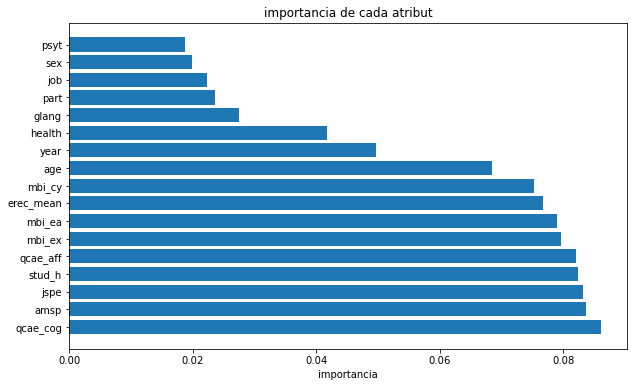

      atribut  importancia
10   qcae_cog     0.086018
12       amsp     0.083636
9        jspe     0.083254
6      stud_h     0.082360
11   qcae_aff     0.082072
14     mbi_ex     0.079679
16     mbi_ea     0.078934
13  erec_mean     0.076720
15     mbi_cy     0.075234
0         age     0.068510
1        year     0.049678
7      health     0.041825
3       glang     0.027496
4        part     0.023668
5         job     0.022315
2         sex     0.019847
8        psyt     0.018755


In [89]:
importance_df = pd.DataFrame({'atribut': X.columns, 'importancia': feature_importances})

importance_df = importance_df.sort_values(by='importancia', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['atribut'], importance_df['importancia'])
plt.xlabel('importancia')
plt.title('importancia de cada atribut')
plt.show()

print(importance_df)